# 1. Importing library
The necessary libraries were imported, including pandas for data manipulation, seaborn and matplotlib for visualization, numpy for numerical computing, and several modules from scikit-learn and TensorFlow for machine learning.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# 2. Loading data
The dataset is read from the given URL and stored in a variable.

In [105]:
rental_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/rental_dataset.csv")
user_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/user_dataset.csv")
shop_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/shop_dataset.csv")
vehicle_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/vehicle_dataset.csv")
ownership_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/ownership_rental_vehicle_dataset.csv")

# 3. Preprocessing Data

### 3.1. Explore The Dataset
Explore the structure and basic statistics of read datasets, such as the number of unique users, rating distribution, and column information.

#### 3.1.1. Rent Dataset

In [106]:
rental_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595 entries, 0 to 14594
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_user            14595 non-null  int64 
 1   id_rental          14595 non-null  int64 
 2   id_vehicle         14595 non-null  object
 3   rating             14595 non-null  int64 
 4   sum_day_of_rental  14595 non-null  int64 
 5   total_pay          14595 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 684.3+ KB


In [107]:
len(rental_dataset['id_user'].unique())

13895

In [108]:
rental_dataset['rating'].value_counts()

rating
5    9825
4    4553
3     146
2      45
1      26
Name: count, dtype: int64

In [109]:
rental_dataset['id_vehicle'].unique()

array(['MTR0031', 'MBL006', 'MTR0016', 'MBL0035', 'MTR005', 'MTR0011',
       'MTR009', 'MTR0033', 'MTR0018', 'MTR0030', 'MBL0025', 'MBL0014',
       'MTR004', 'MTR0017', 'MBL0024', 'MTR0022', 'MBL0033', 'MBL0023',
       'MTR008', 'MBL0032', 'MBL001', 'MBL002', 'MBL005', 'MBL0016',
       'MBL0013', 'MTR007', 'MBL0027', 'MBL0011', 'MTR0020', 'MBL0041',
       'MTR0025', 'MTR0021', 'MBL0037', 'MBL003', 'MBL0017', 'MBL0029',
       'MBL009', 'MBL0018', 'MBL0034', 'MTR0015', 'MTR0024', 'MBL0031',
       'MTR0014', 'MBL004', 'MBL0026', 'MBL0039', 'MTR001', 'MBL0012',
       'MTR0019', 'MBL0028', 'MBL0038', 'MTR0010', 'MTR0032', 'MBL0022',
       'MTR0023', 'MBL007', 'MBL0020', 'MBL0019', 'MBL0030', 'MBL0042',
       'MTR0012', 'MTR0029', 'MBL0040', 'MTR0026', 'MTR0027', 'MBL0036',
       'MTR006', 'MBL0010', 'MTR0013', 'MTR0038', 'MTR003', 'MTR0028',
       'MBL0015', 'MTR0035', 'MTR0034', 'MBL0021', 'MTR002', 'MTR0037',
       'MBL008', 'MTR0039', 'MTR0036'], dtype=object)

In [110]:
vehicle_dataset

,id_vehicle,vehicle_name,engine_type,power,torque,colors,fuel_capacity,transmission,vehicle_type,number_of_seats,brand,model
0,MBL001,Suzuki Ertiga,1.5L VVT Petrol,103 hp,138 Nm,Black,45 liters,5-speed Manual / 4-speed Automatic,Mobil,7,Suzuki,Ertiga
1,MBL002,Suzuki Ertiga,1.5L VVT Petrol,103 hp,138 Nm,Silver,45 liters,5-speed Manual / 4-speed Automatic,Mobil,7,Suzuki,Ertiga
2,MBL003,Suzuki Ertiga,1.5L VVT Petrol,103 hp,138 Nm,White,45 liters,5-speed Manual / 4-speed Automatic,Mobil,7,Suzuki,Ertiga
3,MBL004,Honda Mobilio,1.5L i-VTEC Petrol,118 hp,145 Nm,Black,42 liters,6-speed Manual / CVT,Mobil,7,Honda,Mobilio
4,MBL005,Honda Mobilio,1.5L i-VTEC Petrol,118 hp,145 Nm,White,42 liters,6-speed Manual / CVT,Mobil,7,Honda,Mobilio
...,...,...,...,...,...,...,...,...,...,...,...,...
76,MTR0035,Yamaha NMAX,"Liquid-cooled, 4-stroke",15.1 hp,13.9 Nm,Black,7.1 liters,CVT,Motor,2,Yamaha,NMAX
77,MTR0036,Yamaha NMAX,"Liquid-cooled, 4-stroke",15.1 hp,13.9 Nm,Grey,7.1 liters,CVT,Motor,2,Yamaha,NMAX
78,MTR0037,Yamaha MT-25,"Liquid-cooled, 4-stroke",35.5 hp,23.6 Nm,White,14 liters,6-speed manual,Motor,2,Yamaha,MT-25
79,MTR0038,Yamaha MT-25,"Liquid-cooled, 4-stroke",35.5 hp,23.6 Nm,Black,14 liters,6-speed manual,Motor,2,Yamaha,MT-25


#### 3.1.2. Dataset Shop

In [111]:
shop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_rental       120 non-null    int64  
 1   rental_name     120 non-null    object 
 2   vehicle_type    120 non-null    object 
 3   alamat          120 non-null    object 
 4   kabupaten/kota  120 non-null    object 
 5   kecamatan       120 non-null    object 
 6   no_hp           120 non-null    float64
 7   rating          120 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 7.6+ KB


In [112]:
shop_dataset[shop_dataset['rating'] == '-']

,id_rental,rental_name,vehicle_type,alamat,kabupaten/kota,kecamatan,no_hp,rating


In [113]:
shop_dataset = shop_dataset.drop(columns={'rating','vehicle_type'})

In [114]:
shop_dataset['no_hp'] = shop_dataset['no_hp'].astype(int)
shop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_rental       120 non-null    int64 
 1   rental_name     120 non-null    object
 2   alamat          120 non-null    object
 3   kabupaten/kota  120 non-null    object
 4   kecamatan       120 non-null    object
 5   no_hp           120 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.8+ KB


#### 3.1.3. Dataset Vehicle

In [115]:
vehicle_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_vehicle       81 non-null     object
 1   vehicle_name     81 non-null     object
 2   engine_type      81 non-null     object
 3   power            81 non-null     object
 4   torque           81 non-null     object
 5   colors           81 non-null     object
 6   fuel_capacity    81 non-null     object
 7   transmission     81 non-null     object
 8   vehicle_type     81 non-null     object
 9   number_of_seats  81 non-null     int64 
 10  brand            81 non-null     object
 11  model            81 non-null     object
dtypes: int64(1), object(11)
memory usage: 7.7+ KB


In [116]:
ownership_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_rental      4923 non-null   int64 
 1   id_vehicle     4923 non-null   object
 2   price_per_day  4923 non-null   int64 
 3   num_vehicle    4923 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 154.0+ KB


### 3.2. Merge Data Into One DataFrame
Combine all the datasets that used into one dataframe using appropriate key columns.

In [117]:
data = rental_dataset.merge(user_dataset, on='id_user')
data = data.merge(vehicle_dataset, on='id_vehicle')
data = data.merge(ownership_dataset, on=['id_rental', 'id_vehicle'])
data_full = data.merge(shop_dataset, on='id_rental')

In [118]:
data_full

,id_user,id_rental,id_vehicle,rating,sum_day_of_rental,total_pay,user_name,user_email,vehicle_name,engine_type,...,number_of_seats,brand,model,price_per_day,num_vehicle,rental_name,alamat,kabupaten/kota,kecamatan,no_hp
0,8817,94,MTR0031,5,3,240000,Amari Christian,amari.christian@gmail.com,Honda Scoopy,"Air-cooled, 4-stroke",...,2,Honda,Scoopy,80000,3,Bali Bali Bike Rental,"Jl. Mas Lovina No.1, Anturan, Kalibukbuk, Kabu...",Kabupaten Buleleng,Kec. Buleleng,8123930979
1,11187,94,MTR0031,4,3,240000,Kenneth Robinson,patrickarias@gmail.com,Honda Scoopy,"Air-cooled, 4-stroke",...,2,Honda,Scoopy,80000,3,Bali Bali Bike Rental,"Jl. Mas Lovina No.1, Anturan, Kalibukbuk, Kabu...",Kabupaten Buleleng,Kec. Buleleng,8123930979
2,5885,94,MTR0031,4,3,240000,nur cahaya,nurcahaya@gmail.com,Honda Scoopy,"Air-cooled, 4-stroke",...,2,Honda,Scoopy,80000,3,Bali Bali Bike Rental,"Jl. Mas Lovina No.1, Anturan, Kalibukbuk, Kabu...",Kabupaten Buleleng,Kec. Buleleng,8123930979
3,9787,94,MTR0031,5,3,240000,Giovanna Morton,giovanna.morton@gmail.com,Honda Scoopy,"Air-cooled, 4-stroke",...,2,Honda,Scoopy,80000,3,Bali Bali Bike Rental,"Jl. Mas Lovina No.1, Anturan, Kalibukbuk, Kabu...",Kabupaten Buleleng,Kec. Buleleng,8123930979
4,4087,94,MTR0031,5,3,240000,Karen Frank,karenfrank@gmail.com,Honda Scoopy,"Air-cooled, 4-stroke",...,2,Honda,Scoopy,80000,3,Bali Bali Bike Rental,"Jl. Mas Lovina No.1, Anturan, Kalibukbuk, Kabu...",Kabupaten Buleleng,Kec. Buleleng,8123930979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,11593,23,MBL0010,5,2,500000,Anne Goodman,annegoodman@gmail.com,Honda Brio,1.2L i-VTEC Petrol,...,5,Honda,Brio,250000,3,Bali Matic Rent Car,"Jalan gunung andakasa 999 Denpasar Barat, Pada...",Kota Denpasar,Denpasar Barat,81237097999
14591,417,23,MBL0015,5,2,500000,Michael Richardson,michaelrichardson@gmail.com,Nissan Grand Livina,1.5L Petrol,...,7,Nissan,Grand Livina,250000,3,Bali Matic Rent Car,"Jalan gunung andakasa 999 Denpasar Barat, Pada...",Kota Denpasar,Denpasar Barat,81237097999
14592,5278,23,MBL0021,5,2,1000000,Angelica Franco,angelicafranco@gmail.com,Toyota Avanza,1.5L Petrol,...,7,Toyota,Avanza,500000,3,Bali Matic Rent Car,"Jalan gunung andakasa 999 Denpasar Barat, Pada...",Kota Denpasar,Denpasar Barat,81237097999
14593,3901,23,MBL0021,5,2,1000000,Harley Abbott,harley.abbott@gmail.com,Toyota Avanza,1.5L Petrol,...,7,Toyota,Avanza,500000,3,Bali Matic Rent Car,"Jalan gunung andakasa 999 Denpasar Barat, Pada...",Kota Denpasar,Denpasar Barat,81237097999


### 3.3. Convert Columns to String and Combine Features
Converts multiple columns to string type so they can be combined together. After that, combines relevant features into one string column called "data_features".

In [119]:
data = data_full.copy()
data['price_per_day'] = data['price_per_day'].astype(str)
data['num_vehicle'] = data['num_vehicle'].astype(str)
data['engine_type'] = data['engine_type'].astype(str)
data['power'] = data['power'].astype(str)
data['torque'] = data['torque'].astype(str)
data['colors'] = data['colors'].astype(str)
data['fuel_capacity'] = data['fuel_capacity'].astype(str)
data['transmission'] = data['transmission'].astype(str)
data['vehicle_type'] = data['vehicle_type'].astype(str)
data['number_of_seats'] = data['number_of_seats'].astype(str)
data['brand'] = data['brand'].astype(str)
data['model'] = data['model'].astype(str)
data['rental_name'] = data['rental_name'].astype(str)

data['data_features'] = data['colors'] + " " + data['vehicle_type'] + " " + data['brand']
data = data[['id_user', 'id_rental', 'id_vehicle', 'rating', "data_features"]]
data

,id_user,id_rental,id_vehicle,rating,data_features
0,8817,94,MTR0031,5,White Motor Honda
1,11187,94,MTR0031,4,White Motor Honda
2,5885,94,MTR0031,4,White Motor Honda
3,9787,94,MTR0031,5,White Motor Honda
4,4087,94,MTR0031,5,White Motor Honda
...,...,...,...,...,...
14590,11593,23,MBL0010,5,Black Mobil Honda
14591,417,23,MBL0015,5,Silver Mobil Nissan
14592,5278,23,MBL0021,5,Silver Mobil Toyota
14593,3901,23,MBL0021,5,Silver Mobil Toyota


### 3.4.One Hot Encoding
Split the "data_features" column into individual words and apply one-hot encoding to convert the text to a binary numeric representation. So it can be develop into the model.

In [120]:
data['data_features'] = data['data_features'].str.split(' ')

data_features = data['data_features'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

df_ratings_encode= pd.concat([data, data_features], axis=1)
df_ratings_encode.drop(columns=['data_features'],inplace=True)
df_ratings_encode.info()

<ipython-input-120-455e837a9432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['data_features'] = data['data_features'].str.split(' ')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595 entries, 0 to 14594
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_user     14595 non-null  int64 
 1   id_rental   14595 non-null  int64 
 2   id_vehicle  14595 non-null  object
 3   rating      14595 non-null  int64 
 4   White       14595 non-null  int64 
 5   Motor       14595 non-null  int64 
 6   Honda       14595 non-null  int64 
 7   Blue        14595 non-null  int64 
 8   Yamaha      14595 non-null  int64 
 9   Black       14595 non-null  int64 
 10  Red         14595 non-null  int64 
 11  Kawasaki    14595 non-null  int64 
 12  Silver      14595 non-null  int64 
 13  Green       14595 non-null  int64 
 14  Yellow      14595 non-null  int64 
 15  Grey        14595 non-null  int64 
 16  Mobil       14595 non-null  int64 
 17  Toyota      14595 non-null  int64 
 18  Nissan      14595 non-null  int64 
 19  Suzuki      14595 non-null  int64 
 20  Mitsub

In [121]:
df_ratings_encode.head()

,id_user,id_rental,id_vehicle,rating,White,Motor,Honda,Blue,Yamaha,Black,...,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,8817,94,MTR0031,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11187,94,MTR0031,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5885,94,MTR0031,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9787,94,MTR0031,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4087,94,MTR0031,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.5. Preparing Item Data
Before making the model, the dataframe must be prepare. First, eliminate unnecessary columns and change the feature value to a rating if the feature value is 1. Then, calculate the average rating per user and replace empty values ​​with 0.

In [122]:
df_user = df_ratings_encode.copy()
df_user.drop(columns=['id_rental','id_vehicle'],inplace=True)
df_user

,id_user,rating,White,Motor,Honda,Blue,Yamaha,Black,Red,Kawasaki,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,8817,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11187,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5885,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9787,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4087,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,11593,5,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
14591,417,5,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
14592,5278,5,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
14593,3901,5,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


In [123]:
len(df_user.columns)

20

In [124]:
for i in range(2, len(df_user.columns)):
    feature_column = df_user.columns[i]
    df_user[feature_column] = df_user.apply(lambda row: row['rating'] if row[feature_column] == 1 else np.nan,axis=1)

df_user

,id_user,rating,White,Motor,Honda,Blue,Yamaha,Black,Red,Kawasaki,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,8817,5,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11187,4,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5885,4,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9787,5,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4087,5,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,11593,5,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
14591,417,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN
14592,5278,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN
14593,3901,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN


In [125]:
num_user_columns = df_user.columns[2:]
num_item_columns = df_user.columns[2:]

In [126]:
df_user_avg = df_user.groupby('id_user')[num_user_columns].mean().reset_index()
df_user_avg.fillna(0,inplace=True)
df_user_avg

,id_user,White,Motor,Honda,Blue,Yamaha,Black,Red,Kawasaki,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,1,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0
2,3,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13890,13891,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
13891,13892,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13892,13893,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0
13893,13894,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df_user = pd.merge(df_user,df_user_avg,how='left',on='id_user')
num_columns_to_keep = 1 + len(num_user_columns)
num_columns_to_drop = len(df_user.columns) - num_columns_to_keep
df_user.drop(columns=df_user.columns[1:num_columns_to_drop + 1], inplace=True)
df_user.columns = ['id_user'] + num_user_columns.tolist()
df_user

,id_user,White,Motor,Honda,Blue,Yamaha,Black,Red,Kawasaki,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,8817,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11187,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5885,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9787,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4087,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14590,11593,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
14591,417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
14592,5278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0
14593,3901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0


In [128]:
df_item = df_ratings_encode.copy()
df_item.drop(columns=['id_user','id_rental'],inplace=True)
df_item.head()

,id_vehicle,rating,White,Motor,Honda,Blue,Yamaha,Black,Red,Kawasaki,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,MTR0031,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,MTR0031,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MTR0031,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,MTR0031,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,MTR0031,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.6. Standardize and Normalize Data
Remove unnecessary columns from the item dataframe and apply data standardization using StandardScaler and then normalizes the ratings to a range (-1, 1).

In [129]:
rating = df_ratings_encode['rating'].values

In [130]:
scaler_user = StandardScaler()
scaler_item = StandardScaler()

scaler_user.fit(df_user[num_user_columns])
scaler_item.fit(df_item[num_item_columns])

df_user[num_user_columns] = scaler_user.transform(df_user[num_user_columns])
df_item[num_item_columns] = scaler_item.transform(df_item[num_item_columns])

In [131]:
df_user.head()

,id_user,White,Motor,Honda,Blue,Yamaha,Black,Red,Kawasaki,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,8817,1.550012,1.377683,1.567639,-0.202229,-0.466983,-0.729591,-0.500272,-0.172207,-0.348788,-0.092399,-0.104854,-0.107241,-1.335611,-0.557786,-0.223435,-0.231615,-0.330886,-0.318504
1,11187,1.098862,0.942225,1.114432,-0.202229,-0.466983,-0.729591,-0.500272,-0.172207,-0.348788,-0.092399,-0.104854,-0.107241,-1.335611,-0.557786,-0.223435,-0.231615,-0.330886,-0.318504
2,5885,1.098862,0.942225,1.114432,-0.202229,-0.466983,-0.729591,-0.500272,-0.172207,-0.348788,-0.092399,-0.104854,-0.107241,-1.335611,-0.557786,-0.223435,-0.231615,-0.330886,-0.318504
3,9787,1.550012,1.377683,1.567639,-0.202229,-0.466983,-0.729591,-0.500272,-0.172207,-0.348788,-0.092399,-0.104854,-0.107241,-1.335611,-0.557786,-0.223435,-0.231615,-0.330886,-0.318504
4,4087,1.550012,1.377683,1.567639,-0.202229,-0.466983,-0.729591,-0.500272,-0.172207,-0.348788,-0.092399,-0.104854,-0.107241,-1.335611,-0.557786,-0.223435,-0.231615,-0.330886,-0.318504


In [132]:
df_item.head()

,id_vehicle,rating,White,Motor,Honda,Blue,Yamaha,Black,Red,Kawasaki,Silver,Green,Yellow,Grey,Mobil,Toyota,Nissan,Suzuki,Mitsubishi,Daihatsu
0,MTR0031,5,1.472882,1.296318,1.487968,-0.195445,-0.451564,-0.702642,-0.481404,-0.166132,-0.333904,-0.089896,-0.101214,-0.103267,-1.296318,-0.536712,-0.214852,-0.221912,-0.318866,-0.306052
1,MTR0031,4,1.472882,1.296318,1.487968,-0.195445,-0.451564,-0.702642,-0.481404,-0.166132,-0.333904,-0.089896,-0.101214,-0.103267,-1.296318,-0.536712,-0.214852,-0.221912,-0.318866,-0.306052
2,MTR0031,4,1.472882,1.296318,1.487968,-0.195445,-0.451564,-0.702642,-0.481404,-0.166132,-0.333904,-0.089896,-0.101214,-0.103267,-1.296318,-0.536712,-0.214852,-0.221912,-0.318866,-0.306052
3,MTR0031,5,1.472882,1.296318,1.487968,-0.195445,-0.451564,-0.702642,-0.481404,-0.166132,-0.333904,-0.089896,-0.101214,-0.103267,-1.296318,-0.536712,-0.214852,-0.221912,-0.318866,-0.306052
4,MTR0031,5,1.472882,1.296318,1.487968,-0.195445,-0.451564,-0.702642,-0.481404,-0.166132,-0.333904,-0.089896,-0.101214,-0.103267,-1.296318,-0.536712,-0.214852,-0.221912,-0.318866,-0.306052


In [133]:
scaler = MinMaxScaler((-1,1))
scaler.fit(rating.reshape(-1,1))
rating = scaler.transform(rating.reshape(-1,1))
rating

array([[1. ],
       [0.5],
       [0.5],
       ...,
       [1. ],
       [1. ],
       [0.5]])

### 3.7. Train-Test Split
The dataset is divided into training data (80%) and test data (20%) in the first division. Then, the test data is further divided into test data and validation data (10% each) in the second division. This produces 80% training data, 10% test data, and 10% validation data.

In [134]:
user_train, user_test, item_train, item_test, rating_train, rating_test = train_test_split(df_user[num_user_columns], df_item[num_item_columns], rating.flatten(), test_size=0.2, random_state=42)
user_test, user_val, item_test, item_val, rating_test, rating_val = train_test_split(user_test, item_test, rating_test, test_size=0.5, random_state=42)

user_train.shape, user_test.shape, user_val.shape, item_train.shape, item_test.shape, item_val.shape, rating_train.shape, rating_test.shape, rating_val.shape

((11676, 18),
 (1459, 18),
 (1460, 18),
 (11676, 18),
 (1459, 18),
 (1460, 18),
 (11676,),
 (1459,),
 (1460,))

# 4. Defining Model
Defines neural network models for users and items. Then combines the user and item models into the main model using the dot product of the two vectors generated by the user and item models.

In [135]:
num_features = len(num_user_columns)
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='linear'),
])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='linear'),
])

input_user = tf.keras.layers.Input(shape=(num_features, ))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

input_item = tf.keras.layers.Input(shape=(num_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

output = tf.keras.layers.Dot(axes=1)([vu, vm])

model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 18)]                 0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 18)]                 0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, 32)                   41888     ['input_9[0][0]']             
                                                                                                  
 sequential_5 (Sequential)   (None, 32)                   41888     ['input_10[0][0]']            
                                                                                            

In [136]:
input_user = tf.keras.layers.Input(shape=(num_features, ))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

input_item = tf.keras.layers.Input(shape=(num_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

output = tf.keras.layers.Dot(axes=1)([vu, vm])

model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 18)]                 0         []                            
                                                                                                  
 input_12 (InputLayer)       [(None, 18)]                 0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, 32)                   41888     ['input_11[0][0]']            
                                                                                                  
 sequential_5 (Sequential)   (None, 32)                   41888     ['input_12[0][0]']            
                                                                                            

# 5. Compile and Train The Model
Compile the model with the MeanSquaredError loss function and Adam optimizer, then train the model with the divided data.

In [137]:
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn, metrics=['mse'])

In [138]:
history = model.fit([user_train, item_train], rating_train, epochs=50, verbose=2, batch_size=256, validation_data=([user_val, item_val], rating_val))

Epoch 1/50
46/46 - 3s - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0748 - val_mse: 0.0748 - 3s/epoch - 62ms/step
Epoch 2/50
46/46 - 1s - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0125 - val_mse: 0.0125 - 573ms/epoch - 12ms/step
Epoch 3/50
46/46 - 0s - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0099 - val_mse: 0.0099 - 289ms/epoch - 6ms/step
Epoch 4/50
46/46 - 0s - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0095 - val_mse: 0.0095 - 307ms/epoch - 7ms/step
Epoch 5/50
46/46 - 0s - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0094 - val_mse: 0.0094 - 291ms/epoch - 6ms/step
Epoch 6/50
46/46 - 0s - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0091 - val_mse: 0.0091 - 297ms/epoch - 6ms/step
Epoch 7/50
46/46 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0092 - val_mse: 0.0092 - 298ms/epoch - 6ms/step
Epoch 8/50
46/46 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0088 - val_mse: 0.0088 - 296ms/epoch - 6ms/step
Epoch 9/50
46/46 - 0s - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0088 - val_mse: 0.0088 - 292ms/e

# 6. Prediction for New User
Create a dataframe for the new user, convert the new user's features to the same scale as the training data, then make predictions for the new user and sort the items based on the predictions.

In [139]:
new_user_id = 500000
new_black = 0
new_mobil = 0
new_toyota = 0
new_honda = 5
new_silver = 0
new_daihatsu = 0
new_red = 0
new_white = 5
new_suzuki = 0
new_nissan = 0
new_mitsubishi = 0
new_motor = 5
new_yamaha = 0
new_blue = 0
new_pink = 0
new_grey = 0
new_kawasaki = 0
new_green = 0
new_yellow = 0

new_user = pd.DataFrame([[new_user_id, new_black, new_mobil, new_toyota, new_honda, new_silver, new_daihatsu, new_red, new_white, new_suzuki, new_nissan, new_mitsubishi, new_motor, new_yamaha, new_blue, new_pink, new_grey, new_kawasaki, new_green, new_yellow]], columns=['id_user', 'Black', 'Mobil', 'Toyota', 'Honda', 'Silver', 'Daihatsu', 'Red', 'White', 'Suzuki', 'Nissan', 'Mitsubishi', 'Motor', 'Yamaha', 'Blue', 'Pink', 'Grey', 'Kawasaki', 'Green', 'Yellow'])
new_user

,id_user,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,Suzuki,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,500000,0,0,0,5,0,0,0,5,0,0,0,5,0,0,0,0,0,0,0


In [140]:
new_user[num_user_columns] = scaler_user.transform(new_user[num_user_columns])

new_user = np.tile(new_user[num_user_columns], (df_item.shape[0], 1))
new_user.shape

(14595, 18)

In [141]:
predictions = model.predict([new_user, df_item[num_item_columns]])

457/457 [==============================] - 1s 1ms/step


In [142]:
predictions = scaler.inverse_transform(predictions)
sorted_predictions = np.argsort(predictions, axis=0)[::-1].flatten()
sorted_item = rental_dataset.index.to_numpy()[sorted_predictions].flatten()
sorted_item

array([    0, 13040,  2455, ...,  8443, 12766,  6934])

# 7. Combining Predictions with Real Data
Combine predictions with original data to display more complete and relevant prediction results.

In [143]:
data_test = data_full.copy()
data_test = data_test[['id_user', 'id_rental', 'id_vehicle', 'rating', 'vehicle_name', 'fuel_capacity', 'colors', 'number_of_seats', 'price_per_day', 'num_vehicle', 'rental_name']]

In [144]:
dic_predictions = {
    'userId': np.full((df_item.shape[0],), new_user_id),
    'index': data.iloc[sorted_item].index,
    'predictions': predictions[sorted_predictions].flatten()
}
df_predictions = pd.DataFrame(dic_predictions)
df_predictions.set_index('index', inplace=True)
df_predictions = pd.merge(df_predictions, data_test, how='left', left_index=True, right_index=True).reset_index(drop=True)
df_predictions.drop_duplicates(subset=['id_vehicle'], inplace=True)
df_predictions.drop(columns=['id_user', 'rating'], inplace=True)
df_predictions.rename(columns={'id_user_x': 'id_user'}, inplace=True)
df_predictions.reset_index(drop=True,inplace=True)
df_predictions.head(10)

,userId,predictions,id_rental,id_vehicle,vehicle_name,fuel_capacity,colors,number_of_seats,price_per_day,num_vehicle,rental_name
0,500000,4.992489,94,MTR0031,Honda Scoopy,4.2 liters,White,2,80000,3,Bali Bali Bike Rental
1,500000,4.992489,116,MTR0020,Honda Vario,5.5 liters,White,2,100000,4,3 Monkeys Rental Bali
2,500000,4.992489,109,MTR007,Honda Beat,4.2 liters,White,2,90000,3,cahya ubud rental motorbike
3,500000,4.992489,109,MTR004,Honda ADV,8 liters,White,2,100000,3,cahya ubud rental motorbike
4,500000,4.992489,109,MTR0022,Honda PCX,8 liters,White,2,150000,2,cahya ubud rental motorbike
5,500000,4.992489,117,MTR0015,Honda CBR,15.4 liters,White,2,230000,3,Persewaan Motor & Mobil( Duta Rent )
6,500000,4.977723,119,MTR006,Honda ADV,8 liters,Red,2,120000,2,"Scooter Rental, Bike Rental, Car Rental (Bangk..."
7,500000,4.977723,10,MTR0013,Honda CBR,15.4 liters,Red,2,240000,3,Ami Bali Rental
8,500000,4.977723,6,MTR0024,Honda PCX,8 liters,Red,2,120000,4,Car Rentals Bali
9,500000,4.977723,94,MTR0033,Honda Scoopy,4.2 liters,Red,2,100000,3,Bali Bali Bike Rental


# 8. Model Evaluation and Visualization
Evaluate the model with validation data and create Mean Squared Error (MSE) graphs during training.

In [145]:
val_mse, val_loss = model.evaluate([user_val, item_val], rating_val, verbose=2)

46/46 - 0s - loss: 0.0050 - mse: 0.0050 - 105ms/epoch - 2ms/step


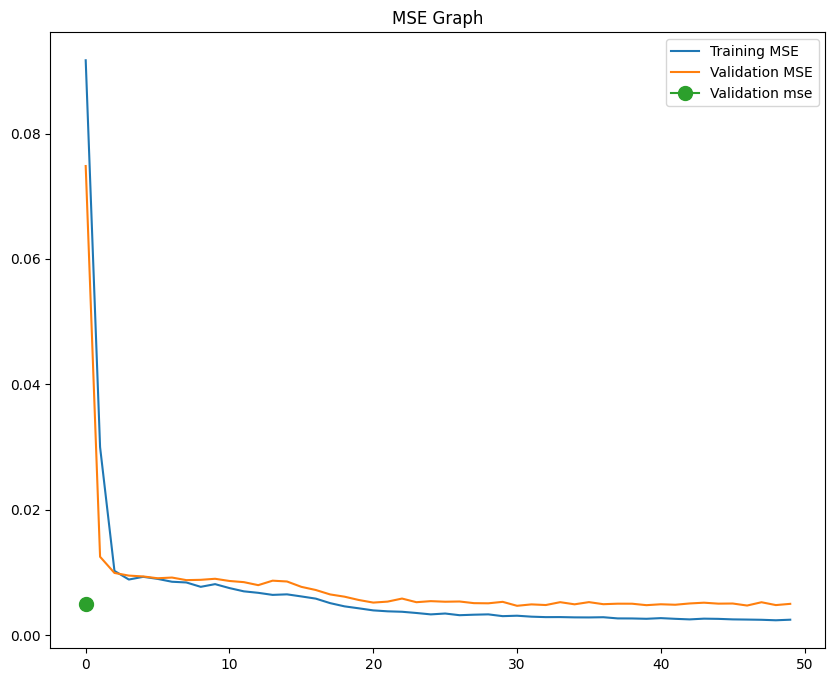

In [146]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.plot(val_mse, label='Validation mse', marker='o', markersize=10)
plt.legend()
plt.title('MSE Graph')
plt.show()

# 9. Save The Model

In [147]:
model.save('rental_recommendation_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
